In [336]:
import torch
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import torch.optim as optim

#
#
# Problem 1: Non-Linear Temperature Model
#
#
celsTemp = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
measTemp = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
celsTemp = torch.tensor(celsTemp)
measTemp = torch.tensor(measTemp)

In [337]:
#create non-linear model
def model(measTemp, w2, w1, b): 
  return w2*measTemp**2 + w1*measTemp + b

w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

tModel = model(measTemp, w2, w1, b)
tModel

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [338]:
#define loss function
def lossFunc(model, celsTemp):
  sqrDiff = (model - celsTemp)**2
  return sqrDiff.mean()

In [339]:
#define training loop
lossHist = torch.zeros(5001)
def trainingLoop(numEpochs, alpha, params, measTemp, celsTemp):
  for epoch in range(1, numEpochs + 1):

    if params.grad is not None:
      params.grad.zero_()

    newModel = model(measTemp, *params)
    loss = lossFunc(newModel, celsTemp)
    loss.backward()

    with torch.no_grad():
      params -= alpha * params.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    lossHist[epoch] = loss

  return params

In [340]:
#normalize data 
normCels = celsTemp * 0.1
normMeas = measTemp * 0.1

In [341]:
#testing training w/ alpha = 1e-4
initParams = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)
numEpochs = 5000
alpha = 0.0001
trainingLoop(numEpochs, alpha, initParams, normMeas, normCels)

Epoch 500, Loss 0.070097
Epoch 1000, Loss 0.060381
Epoch 1500, Loss 0.053458
Epoch 2000, Loss 0.048522
Epoch 2500, Loss 0.044998
Epoch 3000, Loss 0.042480
Epoch 3500, Loss 0.040677
Epoch 4000, Loss 0.039383
Epoch 4500, Loss 0.038450
Epoch 5000, Loss 0.037775


tensor([ 0.0589, -0.1135, -0.0622], requires_grad=True)

In [342]:
#testing different alphas
alphaVals = [0.1, 0.01, 0.001, 0.0001]
for i in alphaVals:
  initParams = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)
  print('Leanrning rate:', i)
  trainingLoop(numEpochs, i, initParams, normMeas, normCels)

Leanrning rate: 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Leanrning rate: 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Leanrning rate: 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Leanrning rate: 0.0001
Epoch 500, Loss 0.070097
Epoch 1000, Loss 0.060381
Epoch 1500, Loss 0.053458
Epoch 2000, Loss 0.048522
Epoch 2500, Loss 0.044998
Epoch 3000, Loss 0.042480
Epoch 3500, Loss 0.040677
Epoch 4000, Loss 0.039383
Epoch 4500, Loss 0.038450
Epoch 5000, Loss 0.037775


In [343]:
#get final parameters
initParams = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)
finalParams = trainingLoop(5000, 0.0001, initParams, normMeas, normCels)
finalParams

Epoch 500, Loss 0.070097
Epoch 1000, Loss 0.060381
Epoch 1500, Loss 0.053458
Epoch 2000, Loss 0.048522
Epoch 2500, Loss 0.044998
Epoch 3000, Loss 0.042480
Epoch 3500, Loss 0.040677
Epoch 4000, Loss 0.039383
Epoch 4500, Loss 0.038450
Epoch 5000, Loss 0.037775


tensor([ 0.0589, -0.1135, -0.0622], requires_grad=True)

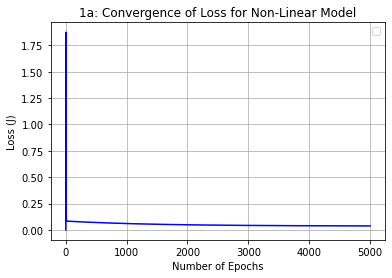

In [344]:
plt.plot(range(1, numEpochs + 2), lossHist.detach().numpy(), color = 'blue')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss (J)') 
plt.title('1a: Convergence of Loss for Non-Linear Model') 
plt.legend()

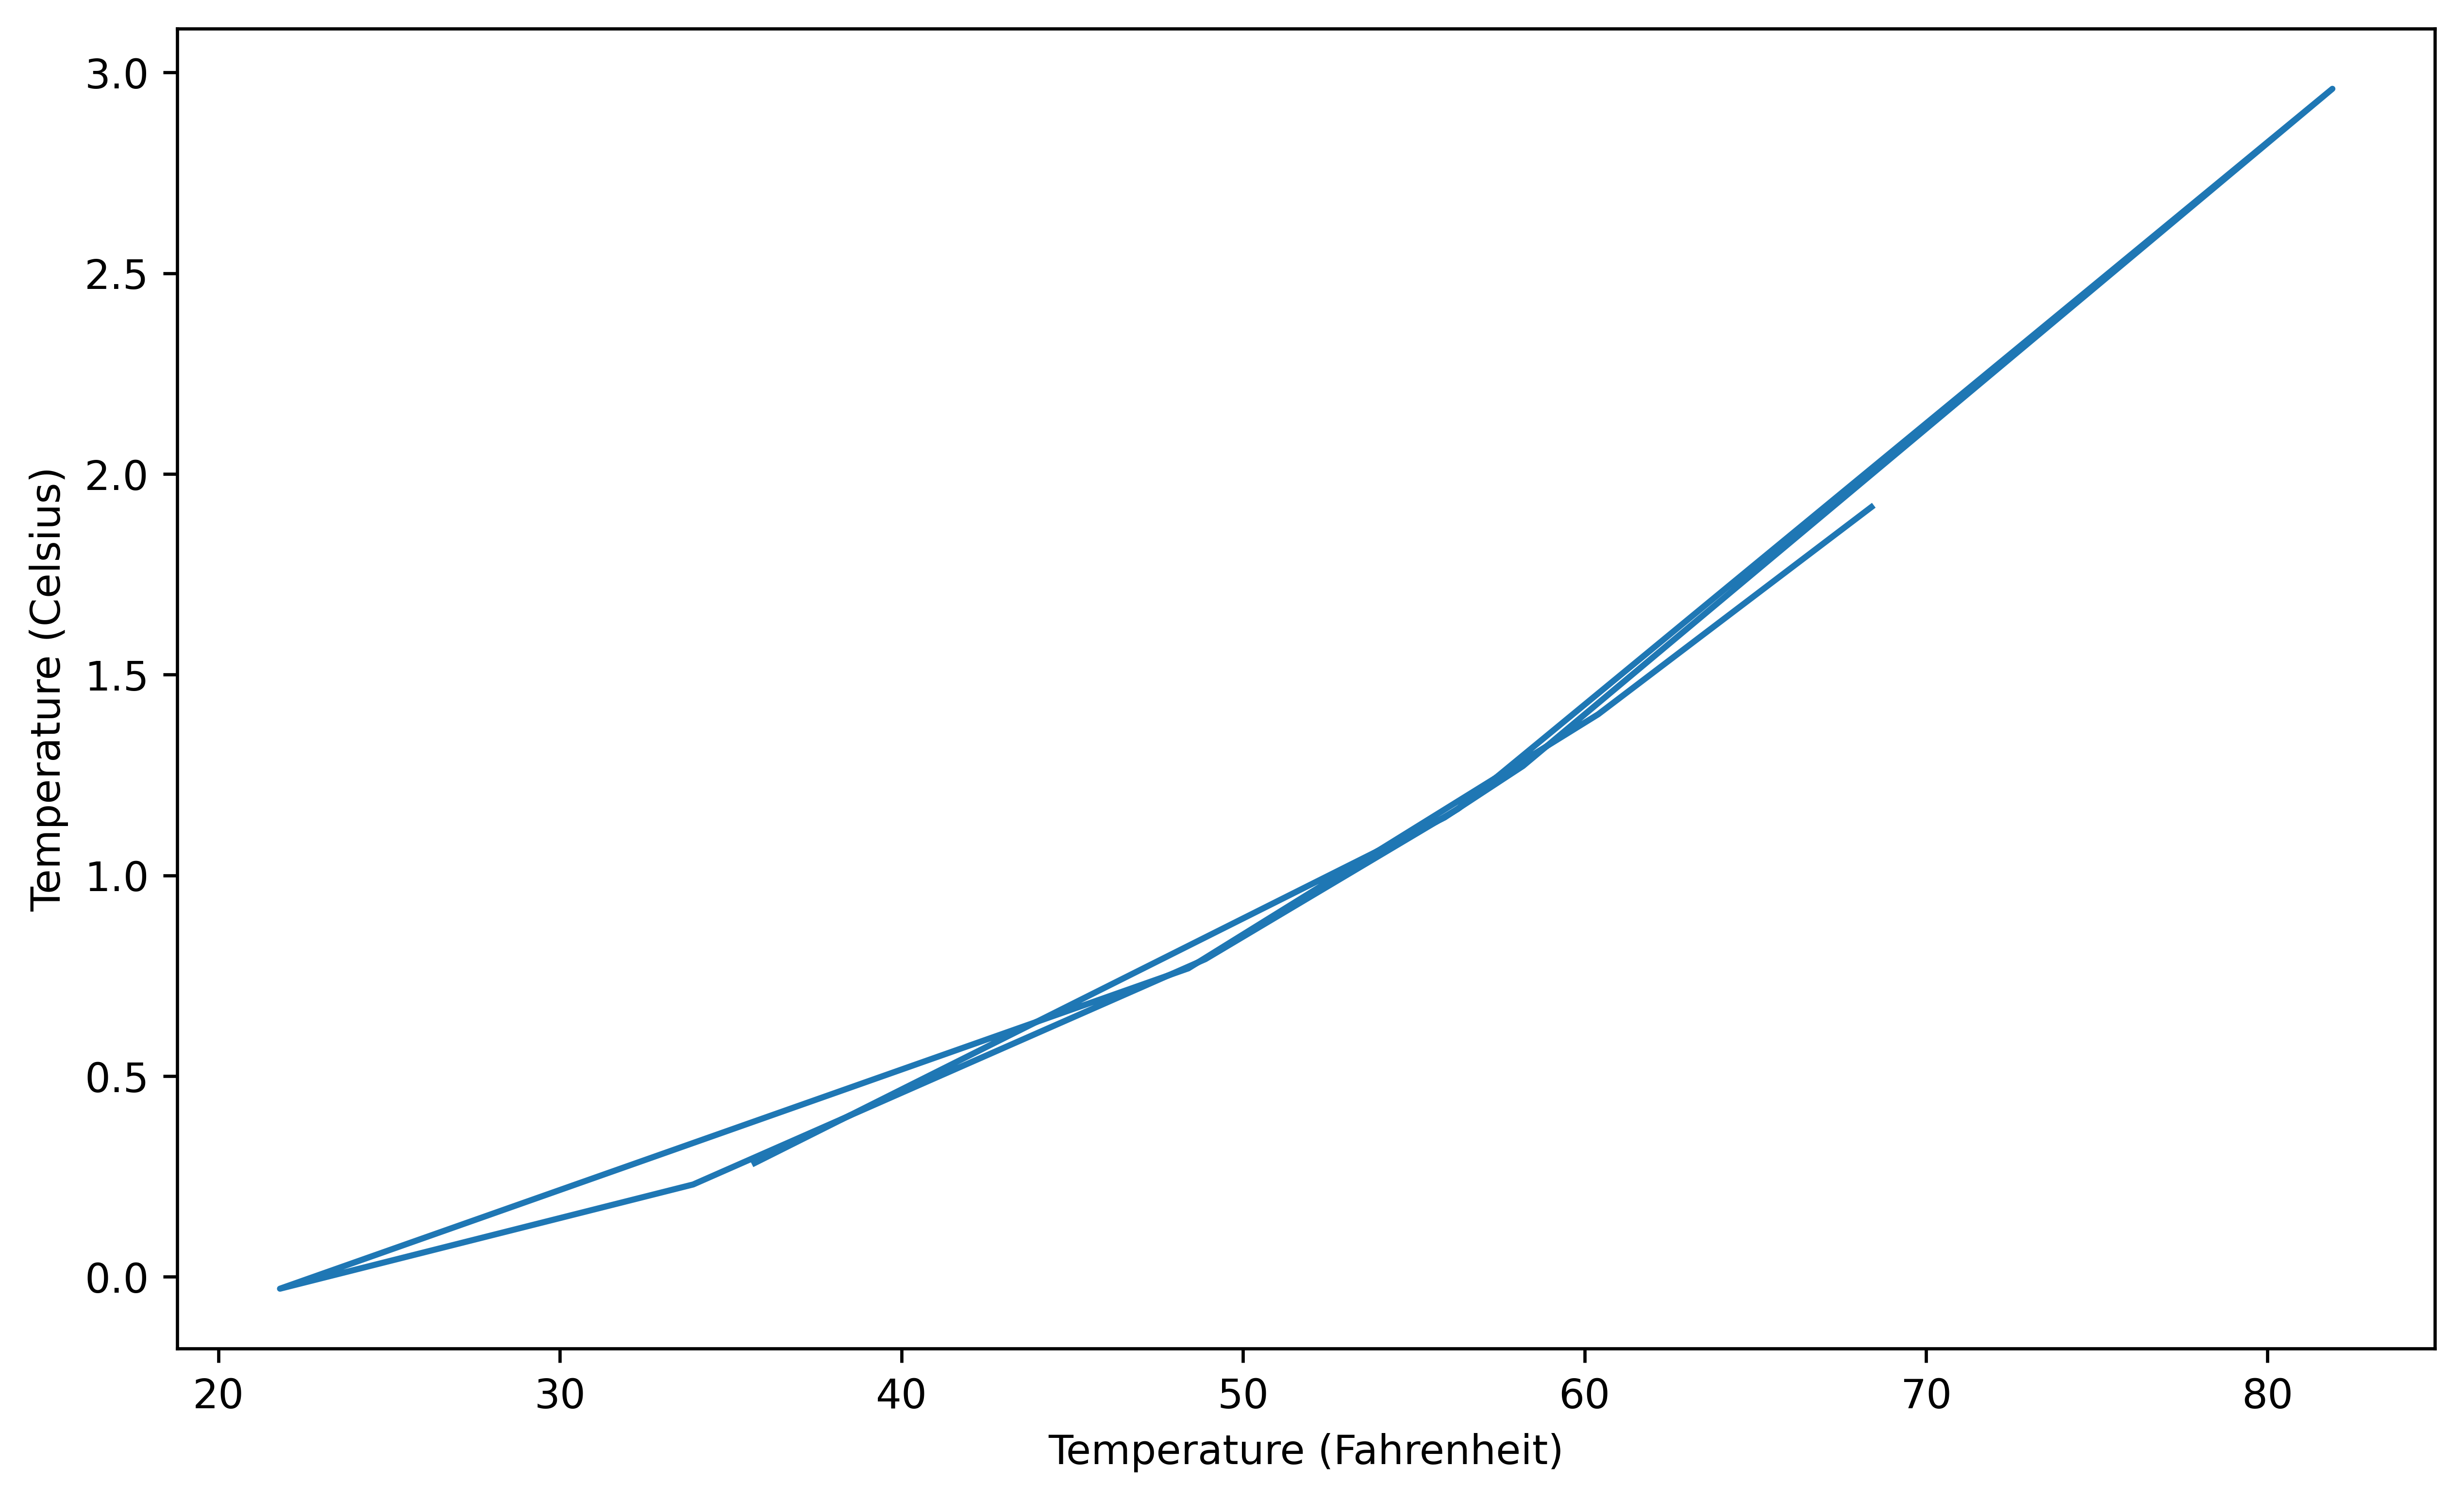

In [345]:
finalModel = model(normMeas, *finalParams)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(measTemp.numpy(), finalModel.detach().numpy())

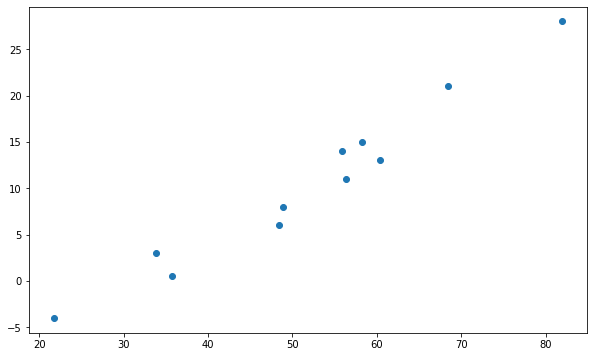

In [346]:
plt.plot(measTemp.numpy(), celsTemp.numpy(), 'o')

In [347]:
#
#
# Problem 3a: Neural Network w/ 8 Hidden Nodes
#
#
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing (6).csv


In [348]:
import io
housing = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [349]:
#extract wanted data
X = housing.iloc[:, [1,2,3,4,10]].values
X[:5]

array([[7420,    4,    2,    3,    2],
       [8960,    4,    4,    4,    3],
       [9960,    3,    2,    2,    2],
       [7500,    4,    2,    2,    3],
       [7420,    4,    1,    2,    2]])

In [350]:
# Get Y data
price = housing.values[:,0]
Y = price.reshape(len(housing), 1)
print('Y data:', Y[:5])
print(Y.shape)

Y data: [[13300000]
 [12250000]
 [12250000]
 [12215000]
 [11410000]]
(545, 1)


In [351]:
#split datasets
from sklearn.model_selection import train_test_split
numpy.random.seed(0)
trainX, validX, trainY, validY = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(trainX[:5])
print(trainY[:5])

[[3620    2    1    1    0]
 [4000    2    1    1    0]
 [3040    2    1    1    0]
 [3600    2    1    1    0]
 [9860    3    1    1    0]]
[[1750000]
 [2695000]
 [2870000]
 [2590000]
 [4515000]]


In [352]:
#standardizing training data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

standard = StandardScaler()
stdTrainX = standard.fit_transform(trainX)
stdTrainY = standard.fit_transform(trainY)
print(stdTrainX[:5])
print(stdTrainY[:5])

[[-0.71677205 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164 -0.81914879]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164 -0.81914879]]
[[-1.5860012 ]
 [-1.09097091]
 [-0.99929863]
 [-1.14597428]
 [-0.13757923]]


In [353]:
#standardize validation data
stdValidX = standard.fit_transform(validX)
stdValidY = standard.fit_transform(validY)
print(stdValidX[:5])
print(stdValidY[:5])

[[-0.50073521  0.02560738 -0.56354451  0.27241586  0.49214421]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  1.73967255]
 [-0.73662142  1.42120937 -0.56354451  0.27241586 -0.75538413]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.49214421]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -0.75538413]]
[[-0.08135801]
 [ 0.80111439]
 [-0.42156349]
 [ 1.30008243]
 [-1.05042817]]


In [354]:
#convert datasets to tensors
stdTrainX = torch.tensor(stdTrainX, dtype=torch.float32)
stdTrainY = torch.tensor(stdTrainY, dtype=torch.float32)
stdValidX = torch.tensor(stdValidX, dtype=torch.float32)
stdValidY = torch.tensor(stdValidY, dtype=torch.float32)
print(stdTrainX.shape)
print(stdTrainY.shape)

torch.Size([436, 5])
torch.Size([436, 1])


In [355]:
from matplotlib.projections.polar import OrderedDict
#creating model
import torch.nn as nn
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear', nn.Linear(5,8)),
            ('hidden_activation', nn.Tanh()),
            ('output_linear', nn.Linear(8,1))
            ]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [356]:
#define neural network training
trainLossHist = torch.zeros(201)
valLossHist = torch.zeros(201)
def neuralTrain(numEpochs, optimizer, model, lossFunc, xTrain, xVal, yTrain, yVal):
  for epoch in range(1, numEpochs+1):

    modelTrain = model(xTrain)
    lossTrain = lossFunc(modelTrain, yTrain)

    modelValid = model(xVal)

    lossVal = lossFunc(modelValid, yVal)
    optimizer.zero_grad()
    lossTrain.backward()
    optimizer.step()

    trainLossHist[epoch] = lossTrain.item()
    valLossHist[epoch] = lossVal.item()

    if epoch % 20 == 0:
      print(f"Epoch {epoch}, Training loss {lossTrain.item():.4f},"
            f"Validation loss {lossVal.item():.4f}")



In [359]:
#set optimizer and run training
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

neuralTrain(numEpochs = 200, 
            optimizer = optimizer, 
            model = seq_model, 
            lossFunc = nn.MSELoss(),
            xTrain = stdTrainX,
            xVal = stdValidX,
            yTrain = stdTrainY,
            yVal = stdValidY
            )


Epoch 20, Training loss 0.9381,Validation loss 0.9281
Epoch 40, Training loss 0.9075,Validation loss 0.8993
Epoch 60, Training loss 0.8790,Validation loss 0.8726
Epoch 80, Training loss 0.8525,Validation loss 0.8477
Epoch 100, Training loss 0.8278,Validation loss 0.8245
Epoch 120, Training loss 0.8048,Validation loss 0.8029
Epoch 140, Training loss 0.7832,Validation loss 0.7827
Epoch 160, Training loss 0.7631,Validation loss 0.7638
Epoch 180, Training loss 0.7443,Validation loss 0.7461
Epoch 200, Training loss 0.7267,Validation loss 0.7296


In [360]:
print(trainLossHist[60])
print(valLossHist[200])

tensor(0.8790)
tensor(0.7296)


In [361]:
#display training results
print('output', seq_model(stdValidX)[:5])
print('answer', stdValidY[:5])
print('hidden', seq_model.hidden_linear.weight.grad)

output tensor([[0.0571],
        [0.5294],
        [0.0037],
        [0.6334],
        [0.0277]], grad_fn=<SliceBackward0>)
answer tensor([[-0.0814],
        [ 0.8011],
        [-0.4216],
        [ 1.3001],
        [-1.0504]])
hidden tensor([[ 0.0026,  0.0023,  0.0038,  0.0033,  0.0022],
        [-0.0461, -0.0433, -0.0599, -0.0556, -0.0372],
        [ 0.0583,  0.0513,  0.0779,  0.0545,  0.0616],
        [ 0.0496,  0.0386,  0.0575,  0.0561,  0.0382],
        [ 0.1115,  0.0861,  0.1379,  0.0860,  0.0776],
        [ 0.0029,  0.0025,  0.0043,  0.0030,  0.0023],
        [-0.0684, -0.0453, -0.1009, -0.0451, -0.0759],
        [ 0.0319,  0.0271,  0.0431,  0.0379,  0.0257]])


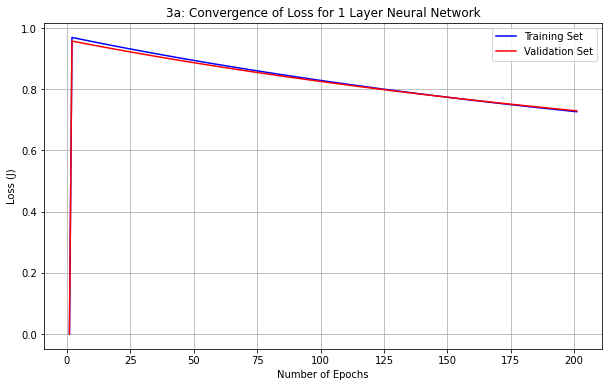

In [363]:
plt.plot(range(1, 200 + 2), trainLossHist.detach().numpy(), color = 'blue', label = 'Training Set')
plt.plot(range(1, 200 + 2), valLossHist.detach().numpy(), color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss (J)') 
plt.title('3a: Convergence of Loss for 1 Layer Neural Network') 
plt.legend()

In [364]:
#
#
# Problem 3b: Multi Hidden Layer Neural Network
#
#
multi_seq_model = nn.Sequential(OrderedDict([
            ('hidden_linear_1', nn.Linear(5,8)),
            ('hidden_activation_1', nn.Tanh()),
            ('hidden_linear_2', nn.Linear(8,5)),
            ('hidden_activation_2', nn.Tanh()),
            ('hidden_linear_3', nn.Linear(5,3)),
            ('hidden_activation_3', nn.Tanh()),
            ('output_linear', nn.Linear(3,1))
            ]))

multi_seq_model

Sequential(
  (hidden_linear_1): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation_1): Tanh()
  (hidden_linear_2): Linear(in_features=8, out_features=5, bias=True)
  (hidden_activation_2): Tanh()
  (hidden_linear_3): Linear(in_features=5, out_features=3, bias=True)
  (hidden_activation_3): Tanh()
  (output_linear): Linear(in_features=3, out_features=1, bias=True)
)

In [367]:
#run training for multi hidden network
optimizer = optim.SGD(multi_seq_model.parameters(), lr=1e-3)

neuralTrain(numEpochs = 200, 
            optimizer = optimizer, 
            model = multi_seq_model, 
            lossFunc = nn.MSELoss(),
            xTrain = stdTrainX,
            xVal = stdValidX,
            yTrain = stdTrainY,
            yVal = stdValidY
            )

Epoch 20, Training loss 0.9968,Validation loss 1.0020
Epoch 40, Training loss 0.9806,Validation loss 0.9861
Epoch 60, Training loss 0.9657,Validation loss 0.9717
Epoch 80, Training loss 0.9521,Validation loss 0.9585
Epoch 100, Training loss 0.9395,Validation loss 0.9463
Epoch 120, Training loss 0.9279,Validation loss 0.9350
Epoch 140, Training loss 0.9170,Validation loss 0.9245
Epoch 160, Training loss 0.9067,Validation loss 0.9147
Epoch 180, Training loss 0.8971,Validation loss 0.9054
Epoch 200, Training loss 0.8879,Validation loss 0.8966


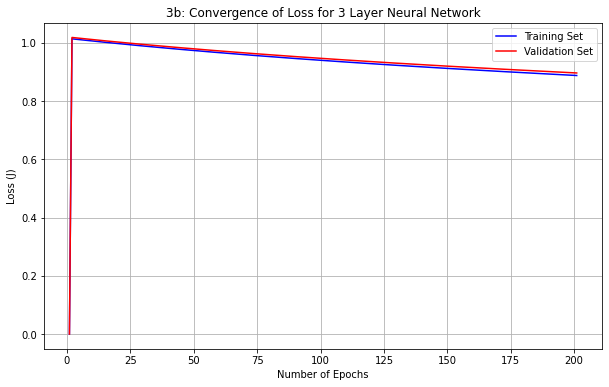

In [368]:
plt.plot(range(1, 200 + 2), trainLossHist.detach().numpy(), color = 'blue', label = 'Training Set')
plt.plot(range(1, 200 + 2), valLossHist.detach().numpy(), color = 'red', label = 'Validation Set')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss (J)') 
plt.title('3b: Convergence of Loss for 3 Layer Neural Network') 
plt.legend()

In [325]:
#
#
# Problem 2
#
#

#create new xData with 1's column for dot product in model()
x0 = torch.ones(len(stdTrainX), 1)
newStdTrainX = torch.hstack((stdTrainX, x0))
newStdTrainX[:5]

tensor([[-0.7168, -1.2944, -0.5733, -0.9331, -0.8191,  1.0000],
        [-0.5389, -1.2944, -0.5733, -0.9331, -0.8191,  1.0000],
        [-0.9882, -1.2944, -0.5733, -0.9331, -0.8191,  1.0000],
        [-0.7261, -1.2944, -0.5733, -0.9331, -0.8191,  1.0000],
        [ 2.2035,  0.0525, -0.5733, -0.9331, -0.8191,  1.0000]])

In [326]:
#create non-linear model
def model(xData, params): 
  return (xData * params).sum()

In [327]:
#define loss function
def lossFunc(model, y):
  sqrDiff = (model - y)**2
  return sqrDiff.mean()

In [328]:
#define training loop
lossHist = torch.zeros(5001)
def trainingLoop(numEpochs, alpha, params, xData, yData):
  for epoch in range(1, numEpochs + 1):

    if params.grad is not None:
      params.grad.zero_()

    newModel = model(xData, params)
    loss = lossFunc(newModel, yData)
    loss.backward()

    with torch.no_grad():
      params -= alpha * params.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  
    lossHist[epoch] = loss

  return params

In [329]:
#testing training
initParams = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
numEpochs = 5000
alpha = 0.0000001
trainingLoop(numEpochs, alpha, initParams, newStdTrainX, stdTrainY)

Epoch 500, Loss 1.000000
Epoch 1000, Loss 1.000000
Epoch 1500, Loss 1.000000
Epoch 2000, Loss 1.000000
Epoch 2500, Loss 1.000000
Epoch 3000, Loss 1.000000
Epoch 3500, Loss 1.000000
Epoch 4000, Loss 1.000000
Epoch 4500, Loss 1.000000
Epoch 5000, Loss 1.000000


tensor([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 5.8672e-08],
       requires_grad=True)

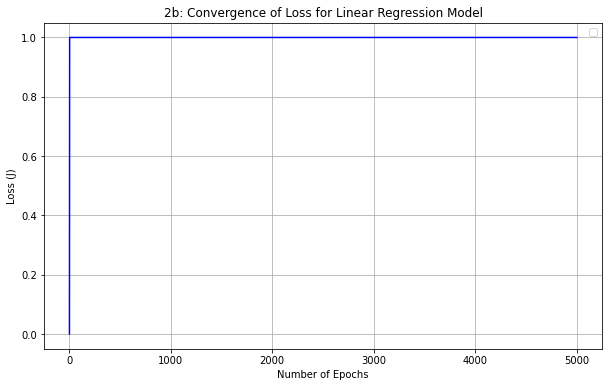

In [330]:
plt.plot(range(1, numEpochs + 2), lossHist.detach().numpy(), color = 'blue')
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Epochs') 
plt.ylabel('Loss (J)') 
plt.title('2b: Convergence of Loss for Linear Regression Model') 
plt.legend()